In [3]:
import streamlit as st
import pandas as pd
import numpy as np
import cv2
import os
import shutil
import globalVal
from plots import draw_fixations
from plots import draw_heatmap
from plots import image_convert
from plots import draw_arrows
from plots import draw_boundingbox
from util import fixation_detection   # util file to find fixation and saccade detection.
from util import fix_count
from util import video_generator
from util import fixations_integration
from util import step_count
from util import turnback_count

import matplotlib.pyplot as plt
import matplotlib.image as img

dataset = globalVal.dataset_path + 'dataset0.csv'
image = globalVal.images_path + 'im3' + '.jpeg'

In [4]:
def load_data():
    data = pd.read_csv(dataset)
    data.fillna(0, inplace=True)    # Using '0' to replace 'N\A'
    return data
data = load_data()
# Only left gaze data is used
x = np.array(data['x_cod_left_gaze'])     # x-coordinate
y = np.array(data['y_cod_left_gaze'])     # y-coordinate
time = np.array(data['time_stamp'])       # time stamp

In [5]:
Sfix, Efix = fixation_detection(x, y, time, missing=0.0, maxdist=15, mindur=50)
fixations = Efix
fixation = draw_fixations(fixations, dispsize = [1920, 1080], imagefile=image,
                          alpha=0.4)

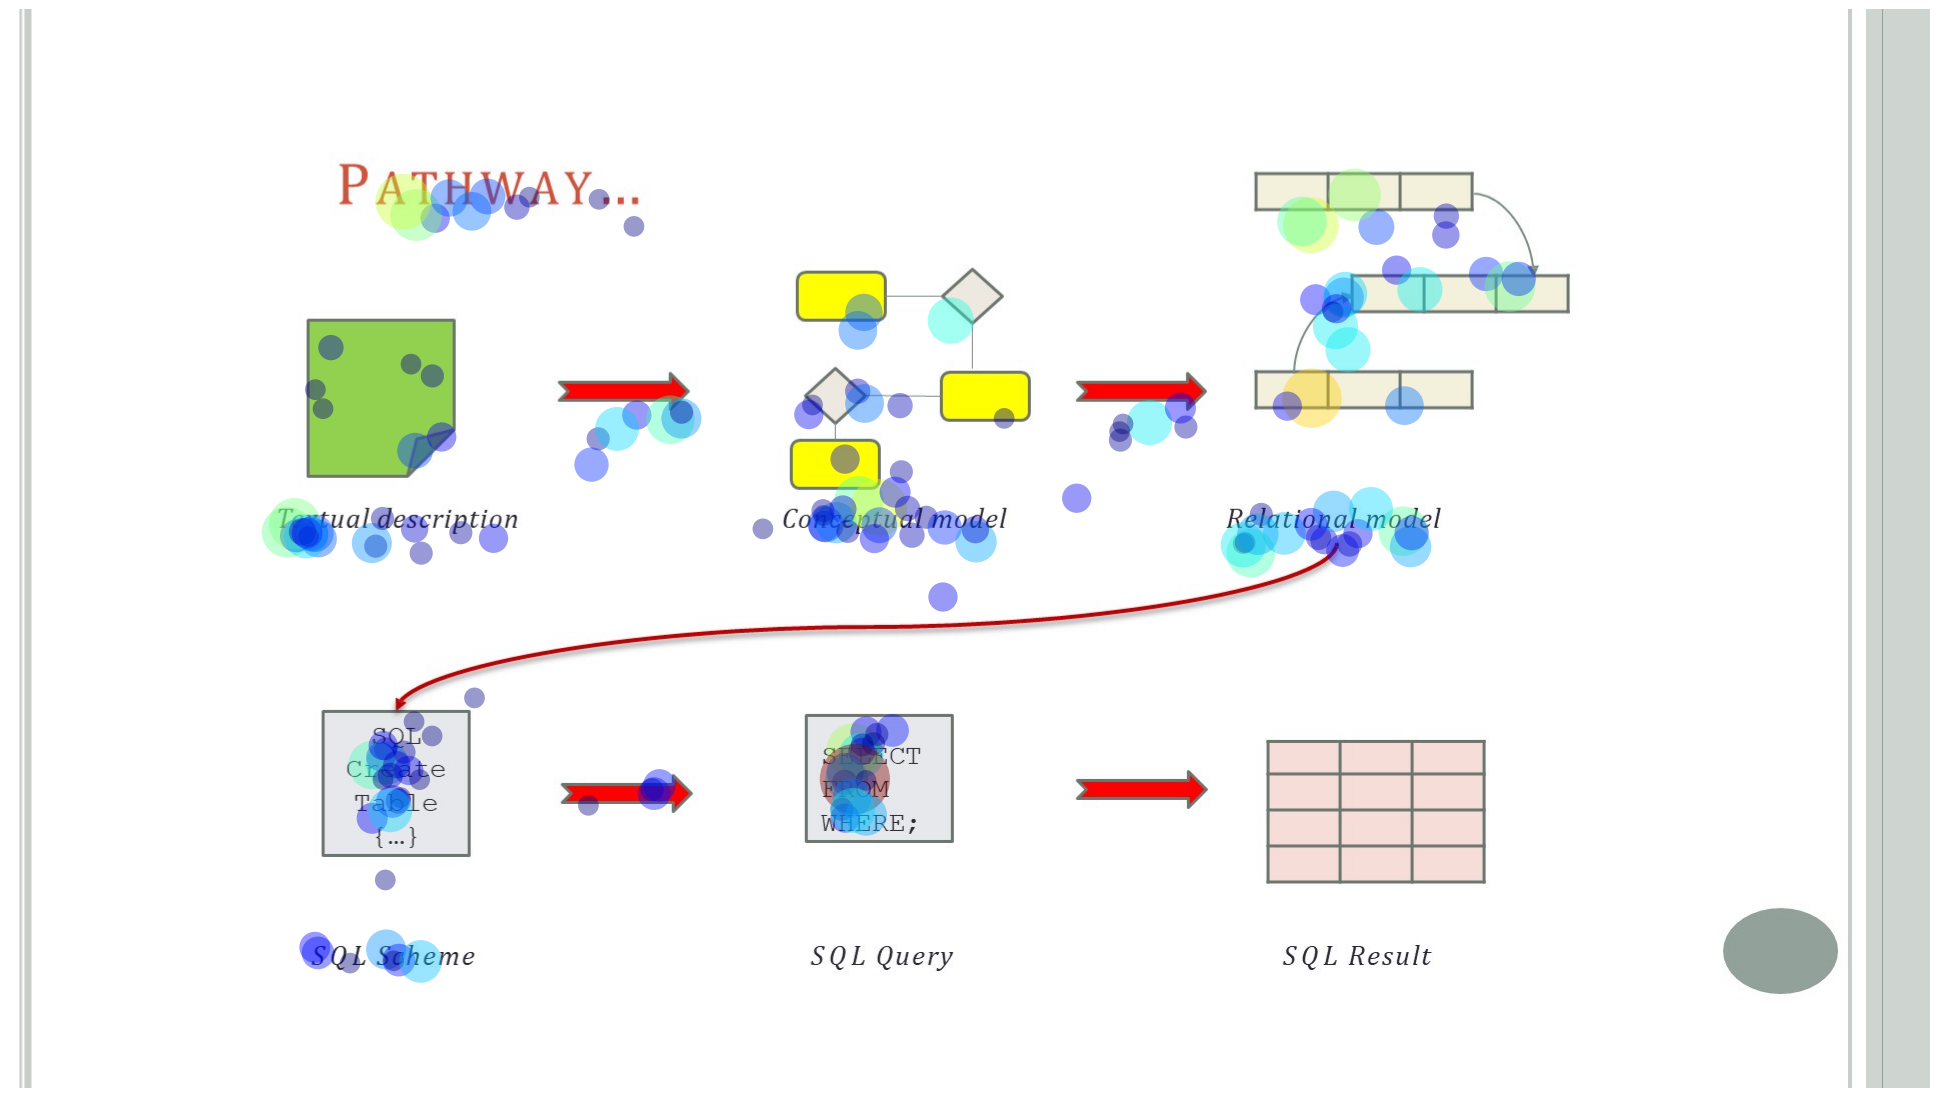

In [6]:
fixation

In [7]:
type(fixation)

matplotlib.figure.Figure

In [8]:
concentrate_location=[430,500,730,870]  #x1,y1,x2,y2  x1,y1为人脸左上角点；x2,y2为人脸右下角点
img=cv2.imread('/Users/lukeshuo/Documents/GitHub/Gaze_Research/dashboard/dataCollector/images/im3.jpeg')  #opencv读取的是BGR数组

In [9]:
#正规马赛克
def do_mosaic(img, x, y, w, h, neighbor=9):
    """
    :param rgb_img
    :param int x :  马赛克左顶点
    :param int y:  马赛克左顶点
    :param int w:  马赛克宽
    :param int h:  马赛克高
    :param int neighbor:  马赛克每一块的宽
    """
    for i in range(0, h , neighbor):
        for j in range(0, w , neighbor):
            rect = [j + x, i + y]
            color = img[i + y][j + x].tolist()  # 关键点1 tolist
            left_up = (rect[0], rect[1])
            x2=rect[0] + neighbor - 1   # 关键点2 减去一个像素
            y2=rect[1] + neighbor - 1
            if x2>x+w:
                x2=x+w
            if y2>y+h:
                y2=y+h
            right_down = (x2,y2)
            cv2.rectangle(img, left_up, right_down, color, -1)   #替换为为一个颜值值

    return img

x=face_location[0]
y=face_location[1]
w=face_location[2]-face_location[0]
h=face_location[3]-face_location[1]
img_mosaic=do_mosaic(img, x, y, w, h, neighbor=15)
cv2.imwrite('img_mosaic.jpg',img_mosaic)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [208, 212, 206],
        [208, 212, 206],
        [208, 212, 206]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [208, 212, 206],
        [208, 212, 206],
        [208, 212, 206]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [208, 212, 206],
        [208, 212, 206],
        [208, 212, 206]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [208, 212, 206],
        [208, 212, 206],
        [208, 212, 206]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [208, 212, 206],
        [208, 212, 206],
        [208, 212, 206]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [208, 212, 206],
        [208, 212, 206],
        [208, 212, 206]]